In [62]:
import pandas as pd

# 데이터 경로
data_path ='/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path+'train.csv', index_col='id')
test = pd.read_csv(data_path+'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

- 데이터를 읽어올 때 index_col파라미터에 'id'를 전달했다.
- index_col은 불러올 DataFrame의 인덱스를 지정하는 파라미터이다. 열 이름을 전달하면 해당 열을 인덱스로 지정한다.
- 이번 대회에서는 index_col을 명시하지 않고 데이터를 불러오면 id라는 열이 보인다.
- 이 열은 타깃 값을 예측하는 데 어떠한 정보도 제공하지 않고 단지 각 행을 구분하는 역할만 한다. 그래서 id를 인덱스로 지정한것이다.


In [63]:
train.shape, test.shape

((300000, 24), (200000, 23))

- 훈련 데이터는 300,000행 24열, 테스트 데이터는 200,000행 23열로 구성돼 있다.


In [64]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [65]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


#### 피처 요약표 만들기
- 이제 모든 피처르 면밀히 살펴봅시다. 피처타입이 무엇인지, 결측값은 없는지, 고유한 값은 몇 개 인지, 실제 어떤 값이 입력돼 있는지 알아보자
- 이를 위해 피처 요약표를 만들엤다. 피처 요약표는 피처별 데이터 타입, 결측값 개수, 고윳값 개수, 실제 입력값 등을 정리한 표이다.

In [66]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데티어 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train)

데이터셋 형상 : (300000, 24)


,피처,데티어 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


#### 피처 요약표 해석하기
- 앞에서 생성한 피처 요약표를 해석해보겠다.
    - 이진(binary)피처 : bin_0~bin_4
        - 이 피처들은 고윳값이 모두 2개이다. 이진 피처라 그렇다. 이중 bin_0, bin_1, bin_2는 데이터 타입이 int64고, 실젯값이 0또는 1로 구성돼 있다.
        - bin_3, bin_4는 object 타입이고, 실젯값은 T 또는 F(bin_3 피처), Y 또는 N(bin_4 피처)이다. T는 True, F는 False, Y는 Yes, N은 No를 의미한다고 보면 된다.
        - 그러므로 모델링할 때 T와 Y는 1로, F와 N은 0으로 인코딩하겠다.
        - 머신러닝 모델은 숫자만 인식하기 때문에 결측값 개수 열에 나와 있듯이 이진 피처에 결측값은 하나도 없다.
    - 명목형(nominal)피처: nom_0~mom_9
        - 모두 object 타입이다. 결측값은 없다.
        - nom_0부터 nom_4는 고윳값이 6개 이하인데, nom_5부터 nom_9는 고윳값이 많다.
        - 또한 mon_5부터 nom_9 피처에는 의미를 알 수 없는 값이 입력돼 있다.
    - 순서형(ordinal)피처 : ord_0~ord_5
        - ord_0 피처만 int64 타입이고 나머지 object 타입이다.
        - 결측값은 역시나 없다. 명목형 데이터와 다르게 순서형 데이터는 순서가 중요하다.
        - 순서에 따라 타깃값에 미치는 영향이 다르기 때문이다. 그래서 순서에 유의하며 인코딩해야한다.
        - 순서를 파악하기 위해 순서형 피처의 고윳값을 출력해보겠다. 고윳값 갯가 적은 ord_0, ord_1, ord_2피처부터 보자
        - 다음과 같이 unique() 함수로 고윳값을 구할 수 있다.
    - 그 외 피처 : day, month, target
  
  


In [67]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_0 고윳값 : [2 1 3]
ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


- unique() 함수는 고윳값이 등장한 순으로 출력해주니 감안해야한다.
- ord_0 피처의 고윳값은 모두 숫자이다. 숫자 크기에 순서를 맞추면 된다.
- ord_1 피처의 고윳값은 캐글 등급이다. 등급에 따라 Novice, Contributor, Expert, Master, Grandmaster 순으로 맞추겠다.
- 이렇게 정리해놔야 인코딩 할 때 순서에 맞게 매핑한다.

In [68]:
for i in range(3,6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값  {train[feature].unique()}')

ord_3 고윳값  ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값  ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값  ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

- 마지막으로 일, 월, 타깃값 요약표를 보겠다.
- day, month, target 피처 모두 int54 타입이고 결측값은 없다.

In [69]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


- day 피처의 고윳값이 7개이다. 요일을 나탄내다고 짐작해볼 수 있다.
- month 피처의 고윳값은 1부터 12이다. 월을 나타낸다.
- 마지막으로 타깃값은 0또는 1로 구성돼 있다.
- 지금까지 피처 요약표를 활용해 각 피처별 타입, 결측값 유무, 고윳값 개수, 실제 입력값을 알아봤다.

## 데이터 시각화

- 피처들을 시각화하여 타깃값별 피처 분포를 알아보겠다. 그래야 어떤 피처가 중요하고 어떤 고윳값이 타깃값에 영향을 많이 주는지 알게 된다.
- 타깃값, 이진 피처, 명목형 피처, 순서형 피처 순서로 그래프를 그려보겠다. 먼저 시각화 라이브러리를 불러온다.

In [70]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 타깃값 분포
- 첫 번째로 타깃값 분포를 알아보겠다. 타깃값 분포를 알면 데이터가 얼마나 불균형한지 파악하기 쉽다.
- 그래야 부족한 타깃값에 더 집중해 모델링을 수행할 수 있다. 
- 이를 위해 분포도 중 하나인 카운트 플롯으로 타깃값 0과 1의 개수를 파악하겠다.
- 카운트플롯은 범주형 데이터의 개수를 확인할 때 주로 사용한다.

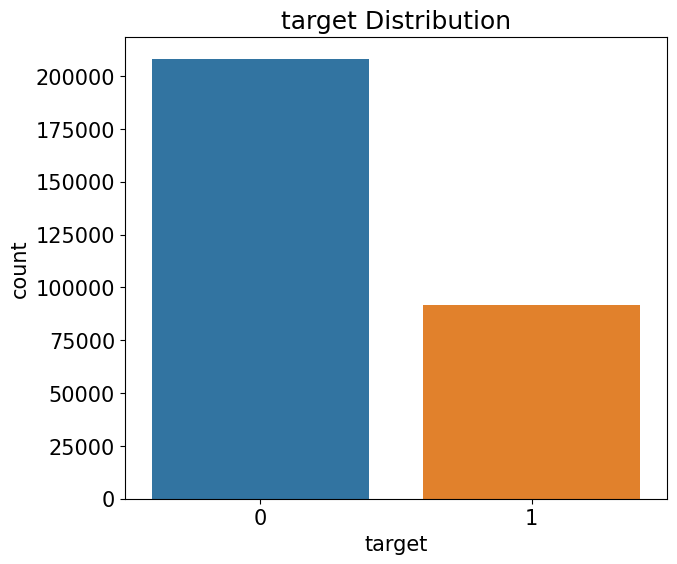

In [71]:
mpl.rc('font', size=15) # 폰트 크기 설정
plt.figure(figsize=(7,6))

# 타깃값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set_title('target Distribution');

- countplot()의 x파라미터에 타깃값('target')을 전달했고, data 파라미터에 훈련 데이터를 전달했다.
- 그러면 train['target']에서 고윳값별로 데이터가 몇 개인지 카운트플롯으롤 구려준다.
- 타겟값 0은 20만개가 좀 넘고 타깃값 1은 9만 개 정도 있다

In [72]:
print(ax.patches)

<Axes.ArtistList of 2 patches>


In [73]:
rectangle = ax.patches[0] # 첫 번째 Rectangle 객체
print('사각형 높이 : ', rectangle.get_height())
print('사각형 너비 : ', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치 : ', rectangle.get_x())

사각형 높이 :  208236.0
사각형 너비 :  0.8
사각형 왼쪽 테두리의 x축 위치 :  -0.4


- get_height()는 Rectangle 객체 도형의 높이, get_width()는 너비, get_x()는 왼쪽 테두리 x축 위치를 반환한다. 이 코드를 이용해 비율을 표시할 위치를 계산해보자

In [74]:
print('텍스트 위치의 x좌표 : ', rectangle.get_x() + rectangle.get_width() / 2.0)
print('텍스트 위치의 y좌료 : ', rectangle.get_height() + len(train) * 0.001)


텍스트 위치의 x좌표 :  0.0
텍스트 위치의 y좌료 :  208536.0


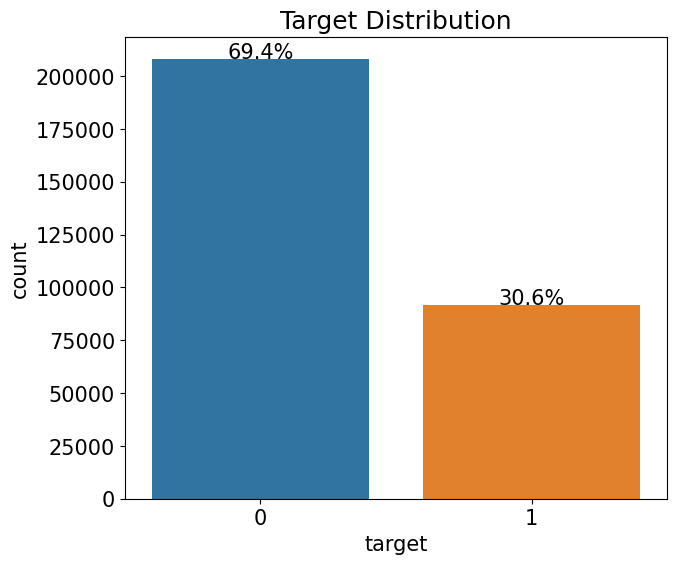

In [75]:
def write_percent(ax, total_size):
    """도형 객체를 순회하며 막대 상단에 타깃값 비율 표시"""
    
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 갯수)
        width = patch.get_width() #e 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x,y) 좌표에 텍스트 입력 (1)
        ax.text(x=left_coord + width/2.0, # x축 위치
               y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%', # 입력 텍스트
                ha='center' # 가운데 정렬 
               )
        
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title("Target Distribution");

- (1)은 (x,y) 좌표를 지정해 비율 값을 입력하는 코드이다. s 파라미터에 입력하려는 텍스트를 전달하면 된다. ha는 텍스트를 수평 정렬하는 파라미터이다.

#### 이진 피처 분포


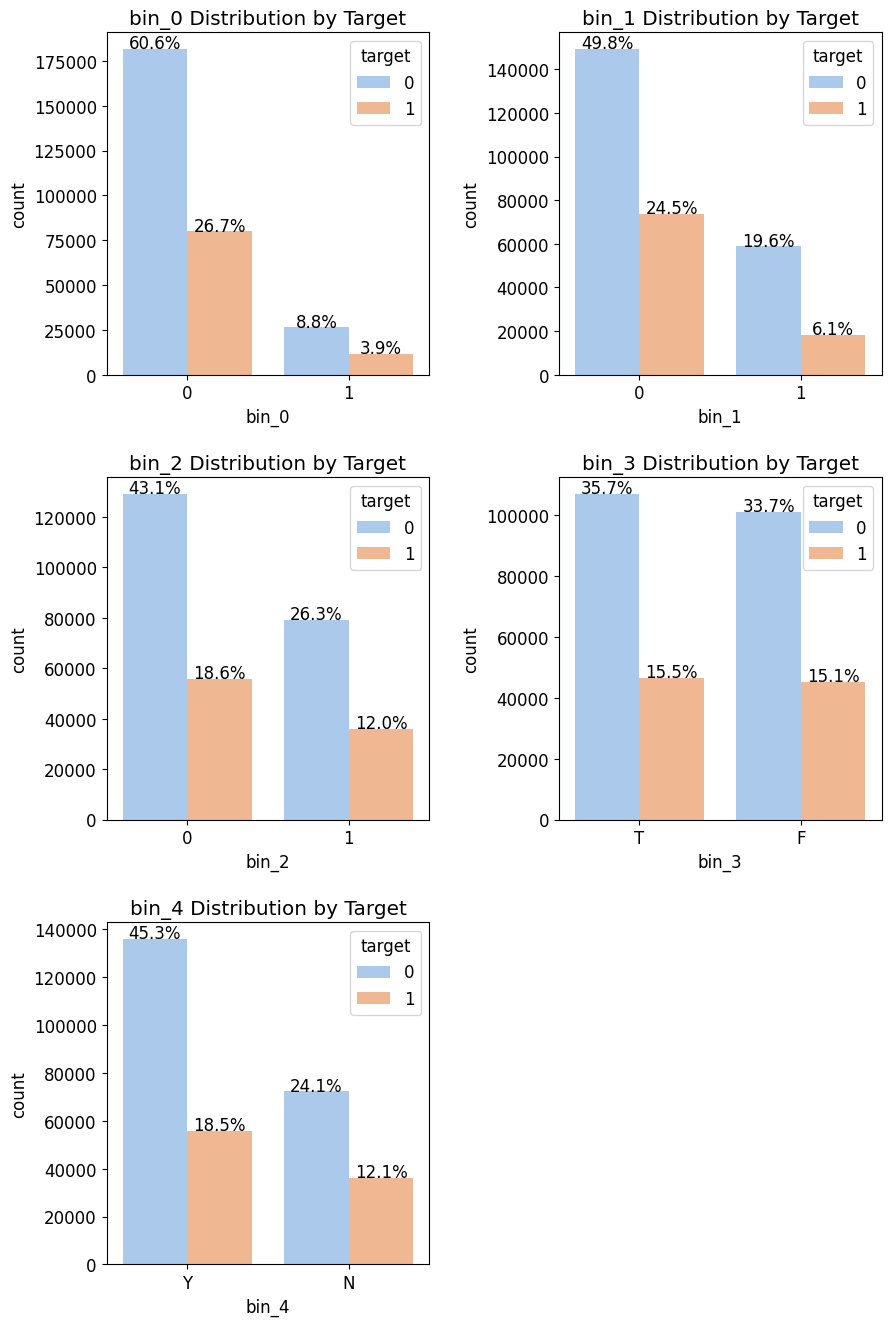

In [76]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치
# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    # ac 축에 타깃값 분포 카운트 플롯 그리기
    sns.countplot(x=feature,
                 data=train,
                 hue='target',
                 palette='pastel', # 그래프 색상 결정
                 ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train)) # 비율 표시

- 코드 (1)은 서브플롯을 3행 2열로 배치한 GridSpec 객체를 grid 변수에 할당한다. 나중에 grid[0], grid[1], ...식으로 원하는 서브플롯을 지정할 수 있다. 이진 피처는 총 5개이므로 마지막 서브플롯에는 그래프를 그리지 않을 계획이다.
- (2)에서는 서브플롯 사이의 여백을 조정했다. subplots_adjust()를 활용하면 좌우, 상하 간격을 따로 조정할 수 있다. wspace=0.4는 좌우 여백을 축 너비의 40%로, hspace=0.3은 상하 여백을 축 높이의 30%로 설정한다. 기본 틀을 갖췄으니 이제 서브플롯을 그릴 차례이다.
- (3) 먼저 이진 피처의 목록을 bin_features에 담은 후 (4)for문을 활용해 각각의 카운트플롯을 그린다. 카운트플롯을 그리는 절차는 이렇다. bin_features를 순회하며 (5)격자(gird)에서 이번 서브플롯을 그릴 위치를 ax축으로 지정하고, (6)ax축에 타깃값 분포를 카운트플롯을 그린 다음 (7)제목을 달고 (8)마지막으로 비율을 표시한다.
- (6)에서 countplot()에 전달한 각 파라미터의 의미는 다음과 같다.
    - x : 피처
    - data : 전체 데이터셋
    - hue : 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    - palette : 그래프 색상맵 pastel을 전달하면 파스텔톤으로 그래프를 그린다.
    - ax : 그래프를 그릴 축

#### 명목형 피처 분포

##### 스텝1 : 교차분석표 생성 함수 만들기
- 교차표 혹은 교차분석표는 범주형 데이터 3개를 비교 분석하는 데 사용되는 표로, 각 범주형 데이터의 빈도나 통계량을 행과 열로 결합해놓은 표를 말한다.
- 여기서 교차분석표를 만든느 이유는 명목형 피처별 타깃값 1 비율을 구하기 위해서이다. 
- 그림에서 포인트플롯이 명목형 피처별 타깃값 1비율을 나타내는 그래프이다. 
- 달리말하면, 이 포인트플롯을 그리기 위해 교차 분석표가 필요하다. 여기서는 교차분석표를 활요앻 2개 범주형 데이터, 즉 명목형 피처와 타깃값을 비교분석하고, 그 결괄르 이용해 그래프를 그려보겠다.
- 판다스의 Crosstab()함수로 교차분석표를 만들 수 있다. 명목형 피처인 nom_0와 타깃값인 target간 교차분석표를 만들어보겠다.

In [77]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


- nom_0의 고윳값은 Blue, Green, Red이다. 이 교차분석표는 고윳값별 타깃값 0과 1이 몇개인지 나타내준다. 예를 들어 nom_0가 Blue이면서 타깃값이 0인 데이터가 72,914개고, 타깃값이 1인 데이터는 23,252개라는 의미이다.
- 개수를 그대로 나타내기보다는 비율로 표현하는 게 한눈에 이해하기 쉽다. normalize 파라미터를 추가해 정규화해보겠다. normalize 파라미터에 index를 전달하면 인데스를 기준으로 정규화한다. 이 교차분석표에서 인덱스틑 nom_0이므로 각 행벼로, 즉 고윳값별로 비율을 구한다는 뜻이다. 교차분석표의 Blue행을 보자. 72,914와 23,252를 정규화된 교차분석표에 100을 곱하겠다.

In [78]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'] ,train['target'], normalize='index') * 100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


- 인덱스 기준으로 정규화한 교차분석표가 백분율로 잘 표현됐다.
- 이어서 인덱스를 재설정하겠다. 현재 인덱스가 피처 이름(nom_0)인데, 이를 열로 가져와야 하기 때문이다. 열로 가져오는 이유는 피처가 열로 설정돼 있어야 그래프를 그리기 편하기 때문이다.

In [79]:
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


- 교차분석표는 앞으로도 계속 사용된다. 재사용하려면 함수로 만들어 놓는게 좋다.

In [80]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

In [81]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [82]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

##### 포인트플롯 생성 함수 만들기
- 스텝1에서 구한 교차분석표를 사용하여 타깃값 1의 비율을 나타내는 포인트플롯을 그리는 함수를 만들겠다.
- 함수 이름은 plot_pointplot()이며 다음의 세 파라미터를 받는다.
    - ax : 포인트플롯을 그릴 축
    - feature : 포인트플롯으로 그릴 피처
    - crosstab : 교차분석표
    
    
- plot_pointplot()은 이미 카운트플롯이 그려진 축에 포인트 플롯을 중복으로 그려준다.

In [83]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성 (1)
    # 새로운 축에 포인트플롯 그리기(2)
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, 
                       order=crosstab[feature].values, # 포인트플롯 순서
                       color='black', # 포인트플롯 색상
                       )# 범례 미표시 legend = False
    
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')
    

- 축 하나에 서로 다른 그래프를 그리려면 x축을 공유해야 한다. (1) ax.twinx()로 x축은 공유하지만, y축은 공유하지 않는 새로운 축 ax2를 만들었다. ax는 카운트플롯을 그리기 위한 축이고, ax2는 포인트플롯을 그리기 위한 축이다. ax와 ax2는 x축을 공유하지만, y축은 서로 다르다.
- (2)pointplot()의 x 파라미터에는 피처, y파라미터에는 타깃값이 1인 비율을 나타내는 1, data 파라미터에는 교차분석표 crosstab을 전달했다. order 파라미터에는 포인트플롯을 그릴 순서를 전달할 수 있다. order=crosstab[feature].values는 교차분석표의 피처(열)순서대로 그리겠다는 뜻이다.
- (3)은 포인트플롯을 더 보기 좋게 하려고, y축의 범위를 설정한 것이다. crosstab[1](타깃값이 1인 비율) 중 최솟값에서 5를 뺀 수치부터 최댓값에 1.1을 곱한 수치까지로 잡았다.

##### 스텝3 : 피처분포도 및 피처별 타깃값1의 비율 포인트플롯 생성함수 만들기
- 이제 get_crosstab()과 plot_pointplot()함수를 활용해 최종적인 그래프를 그리는 함수를 만들어 보겠다.

In [84]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15,20)):
    plt.figure(figsize=size) # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치 (1)
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features): # (2)
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성 (3)
        
        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                     order=crosstab[feature].values,
                     color='skyblue',
                     ax=ax)
        write_percent(ax, len(df)) # 비율 표시
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

- 이 함수는 인수로 받는 feature 피처마다 타깃값별 분포도를 그린다. num_rows, num_cols는 각각 서브플롯 행과 열 개수를 의미한다. size는 전체 Figure크기이며, 기본값은 (15,20)이다.
- 이번에도 (1) 서브플롯을 격자 형태로 배치하기 위해 GridSpec을 사용했고, (2) for문으로 features를 순회하며 서브플롯을 하나씩 그린다. 각각의 서브플롯에 대해 (3)해당 피처와 타깃값의 교차분석표를 만들고, (4) 서브플롯을 그리고, (5)카운트플롯에 비율을 표시한다. 마지막으로 (6) 카운트플롯과 같은 축에 포인트플롯을 덧그린 뒤, (7) 제목을 달았다.

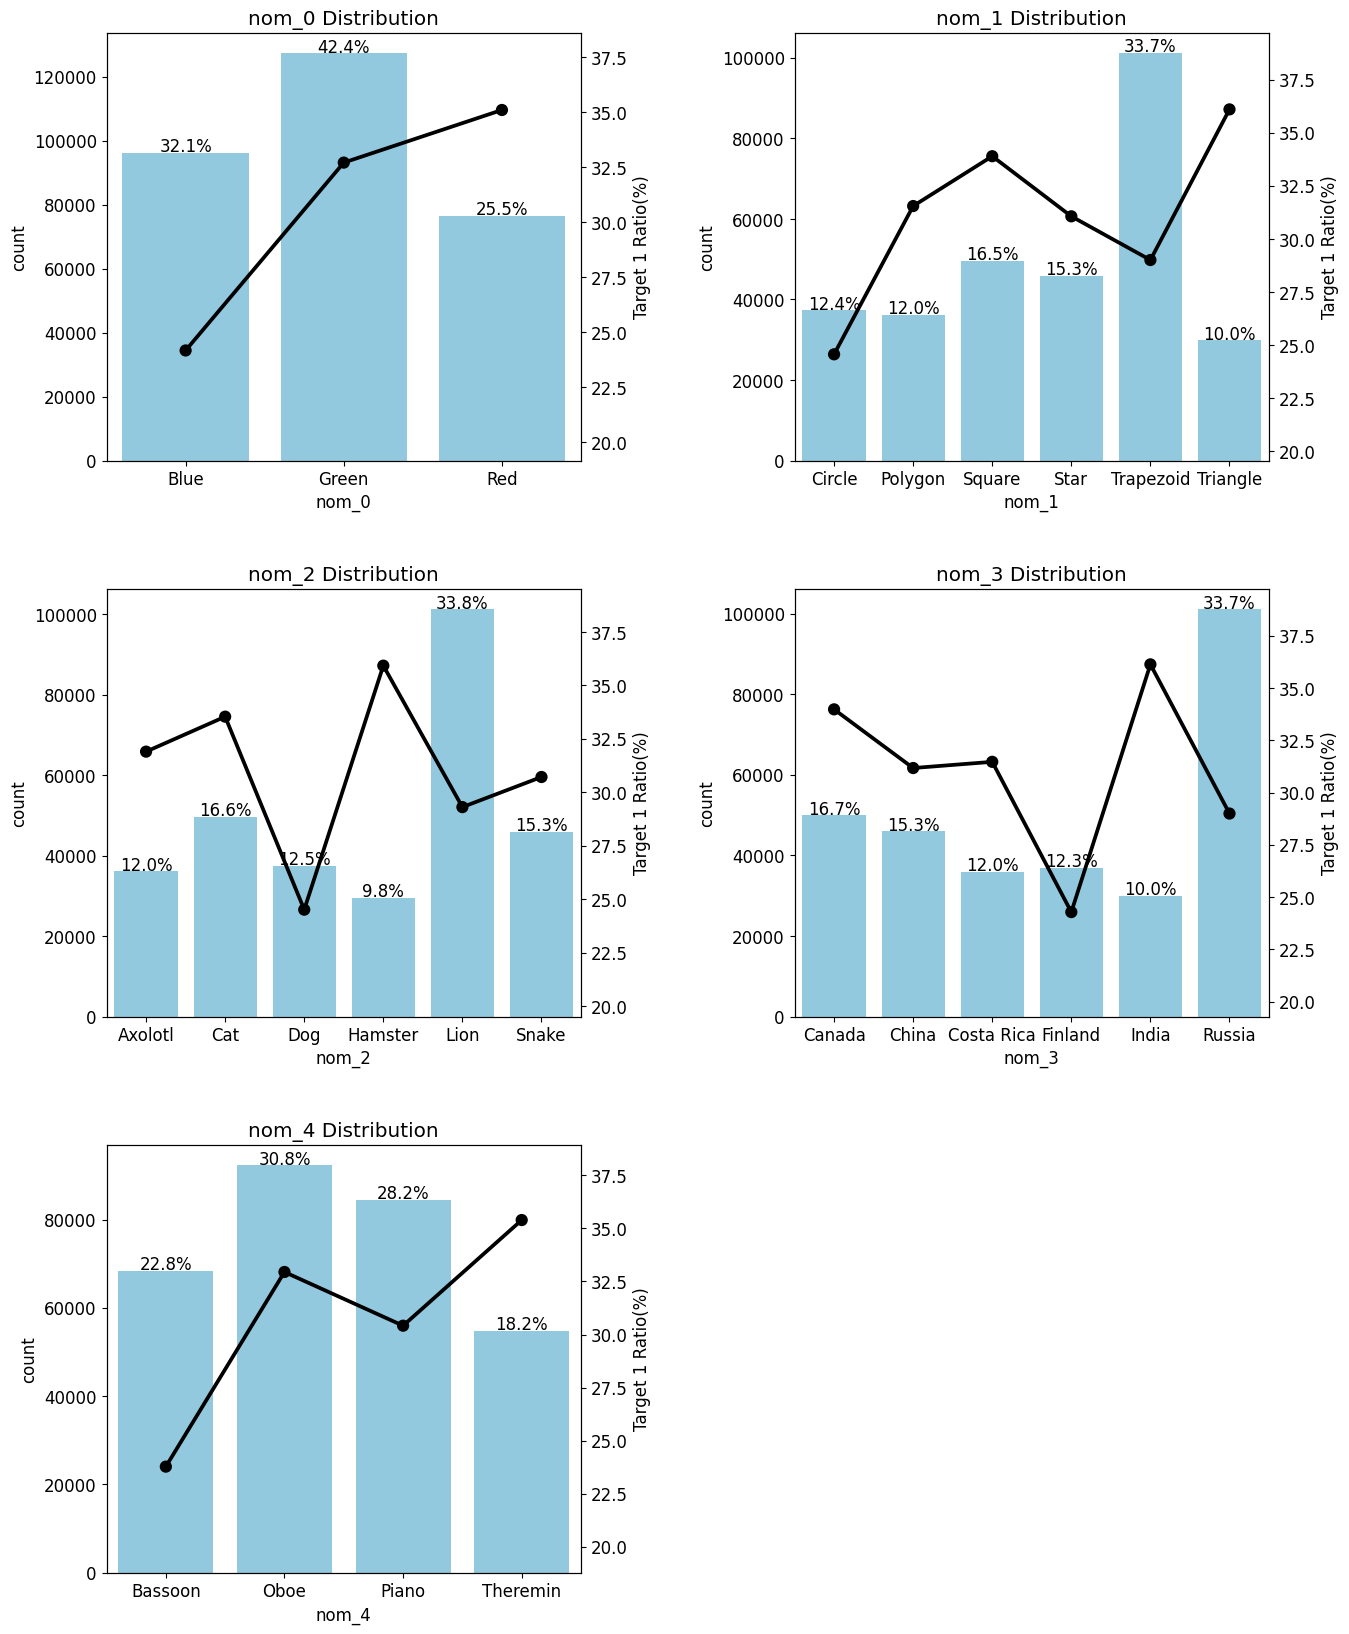

In [85]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

#### 순서형 피처 분포
- plot_cat_dist_with_ratio() 함수를 사용해서 순서형 피처 분포도 살펴보겠다. 순서형 피처는 총 6개이다.'
- 순서형 피처 요약표에서 확인해듯이 ord_0부터 ord_3까지는 고윳값 개수가 15개 이하이다. 반면에 ord_4와 ord_5는 고윳값이 훨씬 많다. 그래서 ord_0부터 ord_3까지는 2행 2열로 그래프를 그리고, ord_4와 ord_5는 2행 1열로 그래프를 따로 그리겠다.

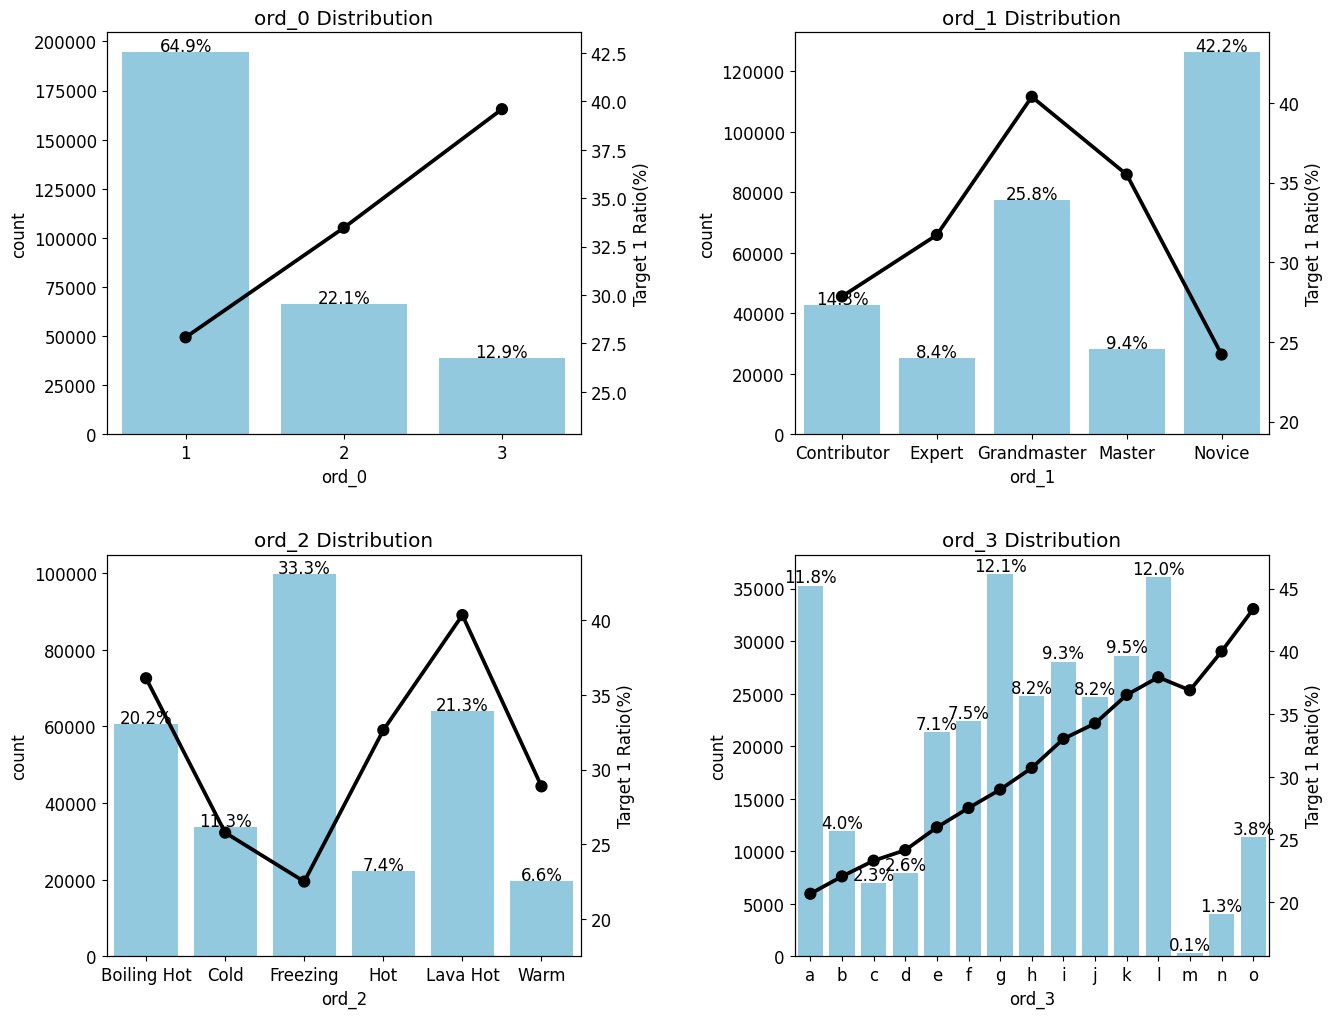

In [86]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

- 그런데 ord_1과 ord_2는 피처 값들의 순서가 정렬되지않았다. ord_1피처는 'Novice' 'Countributor', 'Cold','warm', 'Hot', 'Boiling Hot', 'Lava Hot' 순으로 정렬하겠다.
- CategoricalDtype()을 이용하면 피처에 순서를 지정할 수 있다. 이름에서 알 수 있듯이 원래는 범주형 데이터 타입을 만드는 함수인데, 파라미터를 다음과 같이 설정하면 순서도 같이 지정할 수 있다.
 - categories : 범주형 데이터 타이으로 인코딩할 값 목록
 - ordered : True로 설정하면 catetories에 전달한 값의 순서가 유지된다.
 - CategoricalDtype()을 적용해 ord_1과 ord_2 피처에 순서를 지정해보겠다.

In [87]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Countributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold','Warm','Hot','Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

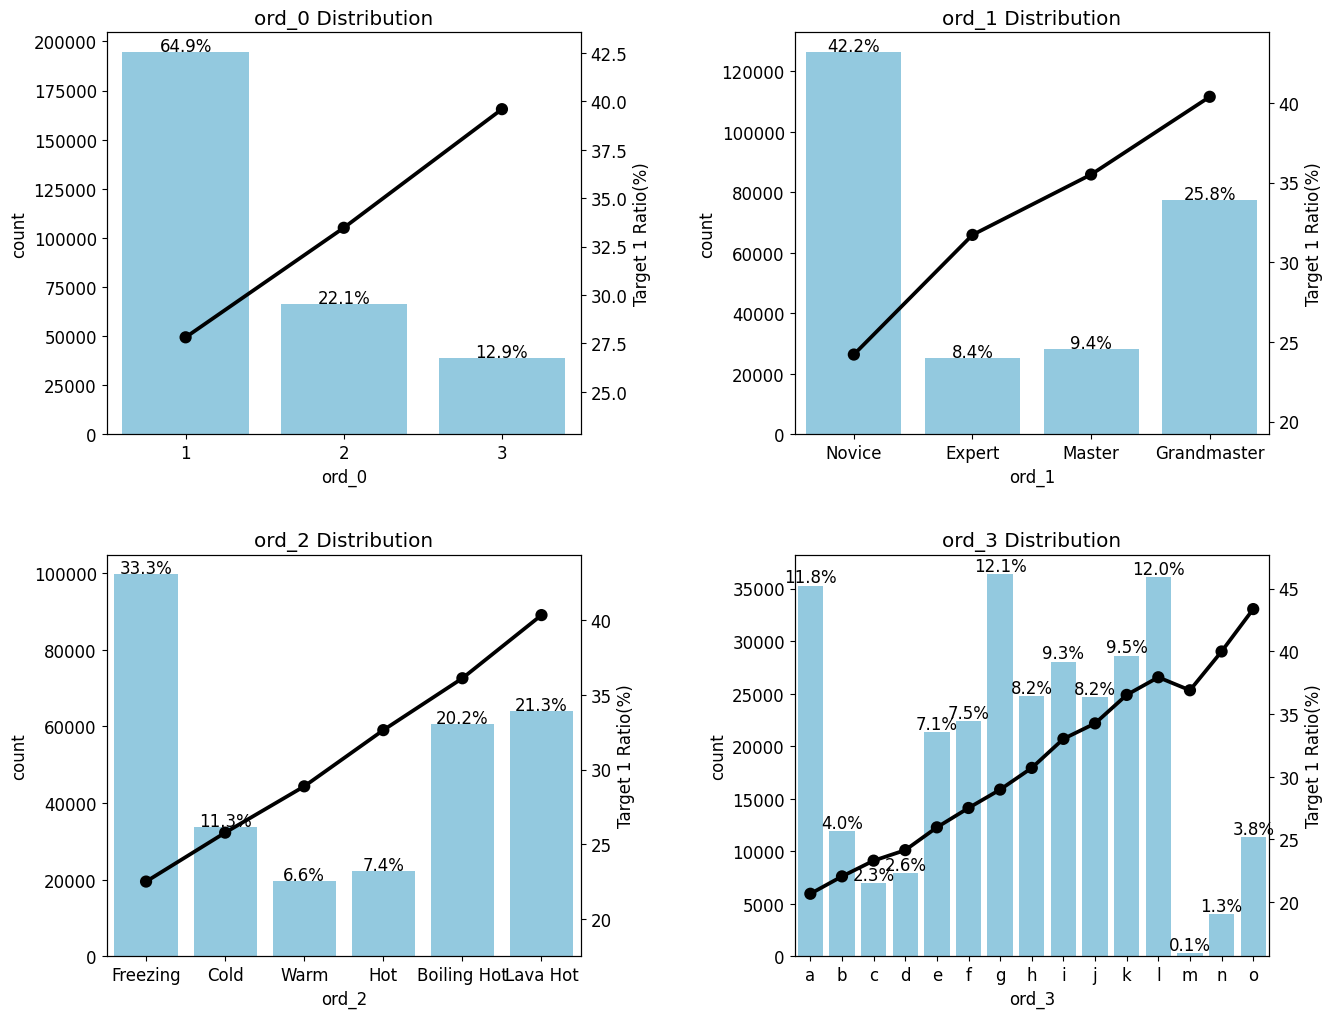

In [88]:
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

- ord_0는 숫자 크기 순으로, ord_1과 ord_2는 지정된 순서대로, ord_3는 알파벳 순으로 정렬됐다. 이 결과로부터 고윳값 순서에 따라 타깃값 1비율도 비례해서 커진다는 것을 확인할 수 있다.
- 다음으루 ord_4와 ord_5의 분포를 보겠다. ord_4와 ord_5는 고윳값 개수가 많기 때문에 가로 길이를 늘려 2행 1열로 그리겠다.

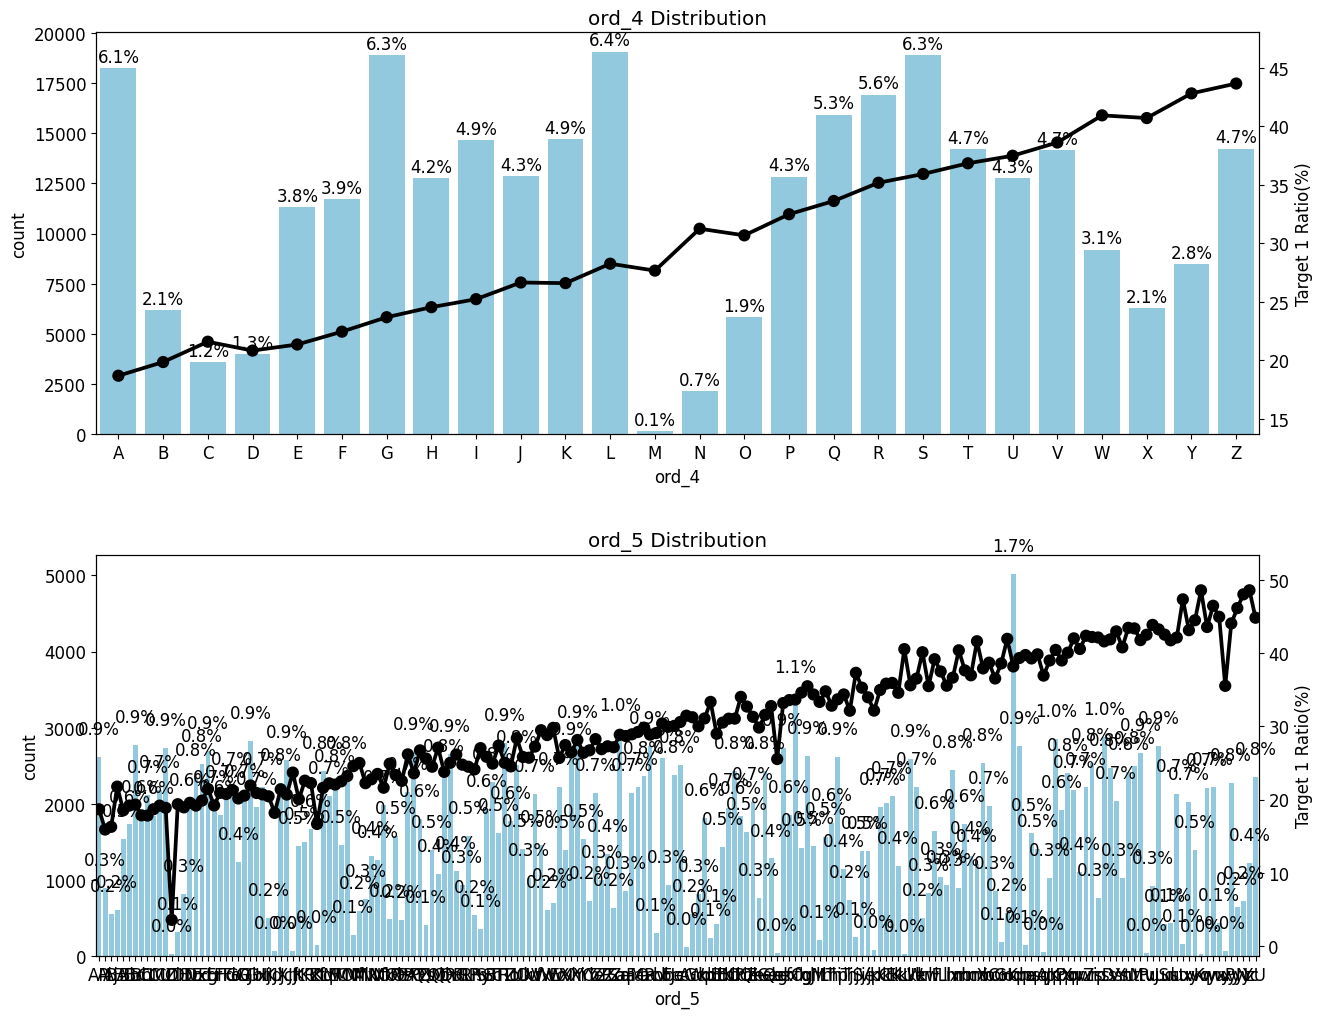

In [89]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 
                             num_rows=2, num_cols=1, size=(15,12))

- ord_5는 고윳값 개수가 워낙 많다 보니 x축 라벨이 겹쳐졌다. 그렇지만 타깃값 1 비율의 전체적인 양상을 보는데는 지장 없다. ord_4, ord_5 모두 고윳값 순서에 따라 타깃값 1비율이 증가한다.
- 이상으로 순서형 피처 모두 고윳값 순서에 따라 타깃값이 1인 비율이 증가한다는 사실을 알 수 있다. 모든 그래프에서 순서 비율 사이에 상관관계가 있으므로 순서형 피처 중에서도 필요 없는 피처는 없어 보인다. 순서형 피처 모델링 시 사용하겠다.

#### 날짜 피처 분포
- 마지막으로 날짜 피처(정확하게는 요일과 월 피처)분포도 살펴보겠다.



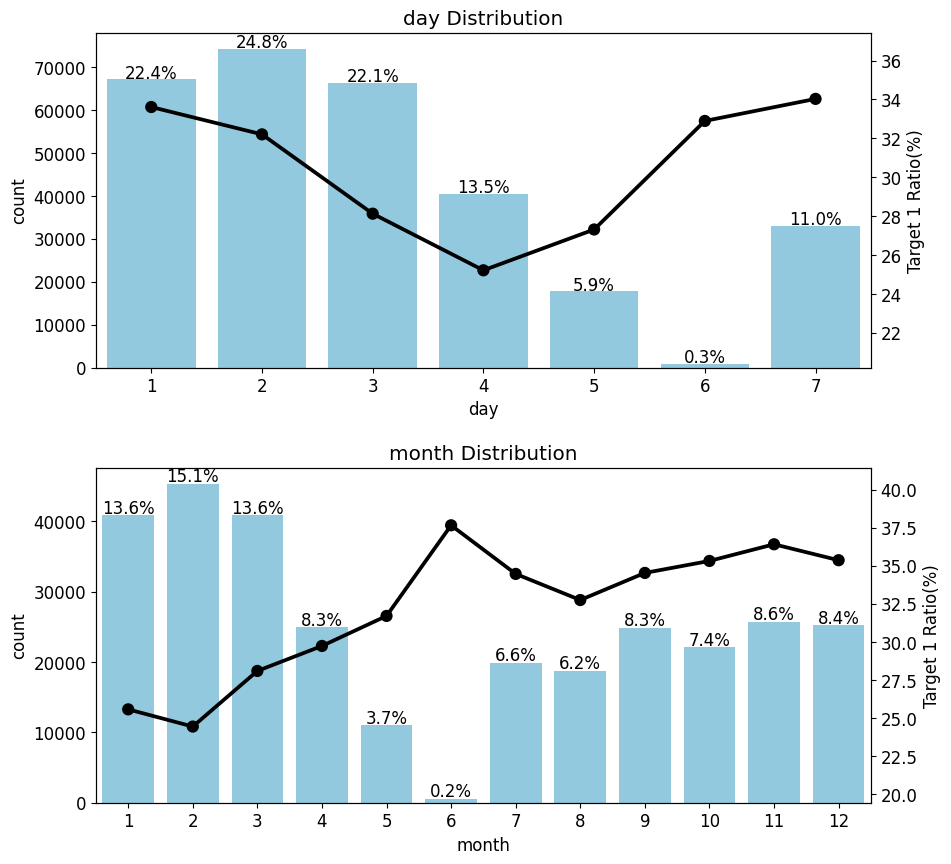

In [90]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows=2, num_cols=1, size=(10,10))

- day 피처는 7개인 걸로 보아 요일을 의미한다고 추측해볼 수 있다. 1에서 4로 올라갈수록 타깃값 1 비율로 줄어들고, 다시 4세어 7로 갈수록 비율이 늘어난다. month 피처는 day 피처와 다소 반대되는 양상을 보인다.
- 가만 보니 요일과 월 피처 모두 값이 숫자이다. 머신러닝 모델은 숫자 값을 가치의 크고 작음으로 해석한다. 가령 1월은 3월보다 2월은과 더 가까운 데이터라고 여긴다. 올바른 해석이다. 그런데 12월과 다음해 1월, 그리고 1월과 2월의 차이는 어떨까? 둘다 한달 차이지만 머신러닝 모델은 차이가 같다고 보지 않는다. 12와 1의 차이는 11이나 되기 때문이죠. 이럴 때 삼각함수(sin, cos)를 사용해 인코딩하면 시작과 끝이 매끄럽게 연결되어 문제가 해결된다. 이렇듯 매년, 매주, 매일 반복되는 데이터를 순환형 데이터라고 부른다. 계절, 월, 요일, 시간등이 이에 속한다.

### 분석 정리 및 모델링 전략
#### 분석 정리
- 결측값은 없다.
- 모든 피처가 중요하여 제거할 피처를 찾지 못했다.
- 이진 피처 인코딩 : 값이 숫자가 아닌이진 피처는 0과 1로 인코딩 한다.
- 명목형 피처 인코딩 : 전체 데이터가 크지 않으므로 모두 원-핫 인코딩한다.
- 순서형 피처 인코딩 : 고윳값들의 순서에 맞게 인코딩한다.(이미 숫자로 되어 있다면 인코딩 필요 없음)
- 날짜 피처 인코딩 : 고윳값들의 순서에 맞게 인코딩한다.(이미 숫자로 되어 있다면 인코딩 필요 없다.)
- 날짜 피처 인코딩 : 값의 크고 작음으로 해석되지 못하도록 원-핫 인코딩한다.

#### 모델링 전략
이번 자의 목표는 데이터 특성에 따른 맞춤형 인코딩 방법을 익히기이다. 따라서 머신러닝 모델은 기본적인 로지스틱 회귀 모델을 계속 사용하면서 피처 엔지니어링에 집중하겠다. 그 외 간단하게 이용할 수 있는 하이퍼파라미터 최적화 등의 성능 개선 팁을 추가로 소개하겠다.
- 베이스라인 모델 : 로지스틱 회귀 모델
    - 피처 엔지니어링 : 모든 피처를 원-핫 인코딩
- 성능 개선 : 추가 피처 엔지니어링과 하이퍼파라미터 최적화
    - 피처 엔지니어링 : 피처 맞춤형 인코딩 피처 스케일링
    - 하이퍼파라미터 최적화 : 그리드 서치
    - 추가 팁 : 검증데이터를 훈련에 이용


## 베이스라인 모델

In [91]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

### 피처 엔지니어링
#### 데이터 합치기
- 머신러닝 모델은 문제 데이터를 인식하지 못한다고 했다. 그렇기 때문에 문자를 숫자로 바꿔야 한다. 이처럼 데이터의 표현 형태를 바꾸는 작업을 인코딩이라고 한다. 불러온 데이터는 문자를 포함한 데이터이므로 인코딩을 해야 한다. 훈련 데이터와 테스트 데이트에 동일한 인코딩을 적용하기 위해 편의상 둘을 합치겠다. 그런 다음 합친 DataFrame에서 타깃값을 제거하겠다. 피처와 타깃값은 따로 분리해서 모델링해야 하기 때문이다.

In [92]:
all_data = pd.concat([train, test]) # 훈련 데이터와 테스트 데이터 합치기
all_data = all_data.drop('target', axis=1) # 타깃값 제거
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


#### 원-핫 인코딩
- 원-핫 인코딩은 대표적인 인코딩 방법이다. 모델링에 사용하기 위해 모든 피처를 원-핫 인코딩 해보겠다. 준비한 all_data에 원-핫 인코딩을 적용해보자

In [93]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성 (1)
all_data_encoded = encoder.fit_transform(all_data)


- (1) 원-핫 인코더 객체를 생성하고 (2) all_data의 모든 피처를 인코딩하여 새로운 변수 all_data_encoded에 저장했다. 간단하게 인코딩이 끝났다.

#### 데이터 나누기
- 공통으로 적용할 인코딩이 끝났으니 훈련 데이터와 테스트 데이터를 다시 나누겠다. 앞서 concat()함수를 써서 훈련 데이터와 테스트 데이트를 이어붙였다. 그러니 여기서는 행 번호를 기준으로 다시 나눌 수 있다.

In [94]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_encoded[:num_train] # 0~num_train - 1행
X_test = all_data_encoded[num_train:] # num_train ~ 마지막 행

y = train['target']

- 추가로 마지막 줄에서 타깃값을 y변수에 저장해뒀다. 사람이 학습할 때 정답이 필요하듯, 머신러닝 모델 훈련시에도 타깃값(정답)이 필요하기 때문이다.
- 다음으로 훈련 데이터에서 일부 검증 데이터를 나누겠다. 훈련 데이터는 모델 훈련에 사용하고, 검증 데이터는 모델 성능 검증에 사용한다. 이렇게 나누는 이유는 검증 데이터를 이용해 제출 전에 모델 성능을 평가해보기 위해서이다. 우리가 무언가 수정했을 때 모델 성능이 좋아졌는지 가늠할 수 있어야 한다. 그래야 모델링를 잘했는지, 아니면 다른 방법을 찾아봐아 햘지 판단할 수 잇다.

In [95]:
from sklearn.model_selection import train_test_split

# 훈련 데이터, 검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.1, stratify=y, random_state=10)

- train_test_split()은 전체 데이터를 훈련 데이터와 검증(혹은 테스트)데이터로 나누는 함수이다. 첫번째 인수로는 피처(X_train)를, 두번째 인수로는 타깃값(y)을 전달한다. test_size와 stratify는 설명할 게 많으니 잠시 미루고, 마지막 random_state는 시드값을 고정하여 다음에 실행해도 같은 결과가 나오게 해준다.
- test_size는 검증 데이터 크기를 지정하는 파라미터이다. 값이 정수면 검증 데이터의 개수를, 실수면 비율을 의미한다. 여기서는 0.1을 전달했으므로 10% 검증 데이터로 분리하겠다는 뜻이다.
- stratify는 사회학에서 수평적 지위 집단으로 나눈다 라는 의미이다. 즉, stratify는 파라미터로 지정한 값을 각 그룹에 공정하게 배준한다는 뜻이다. 여기서는 타깃값인 y를 전달했으므로 타깃값이 훈련 데이터와 검증 데이터에 같은 비율로 포함되게끔 나누준다.
- stratify 파라미터를 지정하지 않으면 훈련 데이터와 검증 데이터에 타깃값이 불균형하게 분포도리 수 있다. 그렇게 되면 훈련과 검증이 올바르게 이루어지지 않으므로 되도록이면 stratify파라미터에 타깃값을 넘겨주는게 바람직하다 

### 모델 훈련

In [96]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42) # 모델 생성
logistic_model.fit(X_train, y_train) # 모델 훈련

LogisticRegression(max_iter=1000, random_state=42)

- max_iter : 모델의 회귀 계수를 업데이트하는 반복 횟수, 모델 훈련 시 회귀 계수를 업데이트 하면서 훈련하느데, 이때 업데이터를 몇 번 할지를 정한다.
- random_state : 값을 지정하면 여러 번 실행해도 매번 똑같은 결과가 나온다. 아무 값으로도 지정해도 상관없다.

### 모델 성능 검증
- 사이킷런은 타깃값 예측 메서드를 두 가지 제공한다. 바로 predict()와 predict_proba()이다. 먼저 predict() 메서드는 타깃값 자체(0이냐 1이냐)를 예측한다. 반면, predict_proba()는 타깃값의 확률(0일 확률과 1일 확률)을 예측한다.

In [97]:
logistic_model.predict_proba(X_valid)

array([[0.23266645, 0.76733355],
       [0.91415796, 0.08584204],
       [0.83014541, 0.16985459],
       ...,
       [0.24890987, 0.75109013],
       [0.49453493, 0.50546507],
       [0.95660918, 0.04339082]])

In [98]:
logistic_model.predict(X_valid)

array([1, 0, 0, ..., 1, 1, 0])

- predict_proba()로 예측한 결과와 비교해보자 첫 행부터 보자 본 대회는 타깃값이 1일 확률을 예측해야한다. 따라서 predict_proba() 메서드롤 예측한 결과의 두번째 열을 타깃 예측값으로 사용한다.

In [99]:
# 검증 데이터를 활용한 타깃예측
y_valid_preds = logistic_model.predict_proba(X_valid)[:,1]

- y_valid_preds 변수에는 검증 데이터 타깃값이 1일 확률이 저장된다.
- 이제 타깃 예측값인 y_valid_preds와 실제 타깃값인 y_valid를 이용해 ROC AUC를구해보자 
- 모델 성능을 검증하려는 절차이다. ROC AUC 점수는 사이킷런의 roc_auc_score()함수로 쉽게 구할 수 있다.

In [100]:
from sklearn.metrics import roc_auc_score # roc auc 점수 계산 함수

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.7965


### 예측 및 결과 제출

In [101]:
# 타깃값 1일 확률 예측
y_preds = logistic_model.predict_proba(X_test)[:,1]

In [102]:
# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission.csv')

## 성능 개선
- 피처 맞춤 인코딩 
- 피처 스케일링
- 하이퍼파라미터 최적화

In [103]:
import pandas as pd
# 데이터 경로
data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

### 피처 엔지니어링 : 피처 맞춤 인코딩
- 이진 피처 인코딩
- 순서형 피처 인코딩
- 명목형, 날짜 피처 인코딩
- 모든 작업이 끝난 후 합치기

#### 데이터 합치기

In [104]:
# 훈련 데이터와 테스트 데이터 합치기
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis=1) # 타깃값 제거

#### 이진 피처 인코딩

In [105]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

- DataFrame의 열(피처)을 호출하면 반환값이 Series타입이다. Series 객체에 map() 함수를 호출하면, 전달받은 딕셔너리나 함수를 Series의 모든 원소에 적용해 결과를 반환한다. 여기서는 map()함수에 딕셔너리를 전달했다.
- 딕셔너리를 이용해 bin_3의 F는 0으로, T는 1로 바꿨다. 마찬가지로 bin_4도 N은0으로, Y는 1로 바꿨다. 이상으로 이진 피처들은 수작업으로 간단하게 인코딩을 완료했다.

#### 순서형 피처 인코딩
- ord_0 피처는 이미 숫자로 구성돼 있어 인코딩하지 않아도 된다.
- ord_1과 ord_2피처는 순서를 정해서 인코딩해보겠다.
- ord_3부터 ord_5는 알파벳 순서대로 인코딩해야한다.
- ord_1과 ord_2피처부터 인코딩해보자 이번에도 map()함수를 사용해 수작업으로 인코딩한다. 이때 피처값 순서에 유의해야한다.

In [106]:
ord1dict = {'Novice':0, 'Contributor':1,
           'Expert':2, 'Master':3, 'Grandmaster':4}

ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2,
           'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

- 다음은 ord_3, ord_4, ord_5차례이다. 이 피처들은 알파벳 순서대로 인코딩해야한다.

In [107]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder()
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

# 피처별 인코딩 순서 출력
for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

#### 명목형 피처 인코딩
- 명목형 피처는 순서를 무시해도 되기 때문에 원-핫 인코딩을 적용하겟다.
- 먼저 지능형 리스트를 활용해 명목형 피처 리스트르 만든다.
- 명목형 피처는 nom_0부터 nom_9까지 총 10개이다.

In [108]:
nom_features = ['nom_' + str(i) for i in range(10)] # 명목형 피처

- 이 명목형 피처를 원-핫 인코딩해 별도 행렬에 저장하고, 이어서 all_data에서 명목형 피처를삭제하겠다. 원-핫 인코딩을 하면 열 개수가 늘어나서 all_data에서 곧바로 인코딩할 수 없다.

In [109]:
# 안되는 코드
# from sklearn.preprocessing import OneHotEncoder

# onehot_encoder = OneHotEncoder()
# all_data[nom_feqtures] = onehot_encoder.fit_transform(all_data[nom_features])

In [110]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

- OneHotEncodef로 원-핫 인코딩을 적용하면 희소행렬을 CSR 형식으로 반환한다.
- 츨력 결과를 보면 원-핫 인코딩된 명목형 피처의 행렬 크기가(500000x16276)이다. 
- 원-핫 인코딩 때문에 열이 16276개나 생성된 것이다.

#### 희소 행렬과 COO, CSR 형식
- 대부분 값이 0으로 채워진 행렬을 희소 행렬이라고 한다. 반대로 대부분 값이 0이 아닌 값으로 채워진 행렬을 밀집 행렬이라고 한다.
- 원-핫인코딩을 적용하면 희소 행렬을 만든다. 그러면 메모리 낭비가 심할 것이다. 행렬 크기도 늘어서 연산 시간도오래걸린다.
- 이런 문제를 개선하도록 행렬 형식으로 변환해줘야 한다. 대표적으로 COO(coordinate list)형식과 CSR(compressed sparse row)형식이 있다. 희소 행렬을 COO 형식이나 CSR 형식으로 표현하면 메모리 낭비를 줄일 수 있다.
- 이중에서도 CSR 형식이 메모리를 더 적게 쓰면서 연산도 빠르다. 그래서 일반적으로 COO형식보다 CSR형식을 많이 쓴다.

- 명목형 피처를 원-핫 인코딩한 결과를 encoded_nom_matrix에 저장햇다. 이는 CSR형식의 행렬이다.
- 마지막으로 all_data에서 기존 명목형 피처를 삭제하겠다. 추후 encoded_nom_matrix와 all_data를 합칠텐데, 그러면 하나의 피처가 형식만 다르게 중복되어 들어가기 때문이다.

In [111]:
all_data = all_data.drop(nom_features, axis=1)# 기존 명목 피처 삭제

#### 날짜 피처 인코딩

In [112]:
data_features = ['day','month'] # 날짜 피처

# 원-핫 인코딩 적용
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])

all_data = all_data.drop(date_features, axis=1)

encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

### 피처 엔지니어링 : 피처 스케일링
- 피처 스케일링이란 서로 다른 피처들의 값의 범위가 일치하도록 조정하는 작업이다. 피처 스케일링이 필요한 이유는 수치형 피처들의 유효 값 범위가 서로 다르면 훈련이 제대로 안될 수 있기 때문이다.
- 우리의 경우 앞 절에서 이진, 명목형, 날짜 모두 0과 1로 인코딩했다. 하지만 순서형 피처는 여전히 여러 가지 값을 갖고 있으므로 순서형 피처의 값 범위도 0~1사이가 되도록 스케일링해주겠다.

#### 순서형 피처 스케일링
- 다른 피처들과 범위를 맞추기 위해 순서형 피처에 min-max 정규화를 적용하겠다. mon-max 정규화는 피처 값의 범위를 0~1로 조정한다.

In [113]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)] # 순서형 피처
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

#### 인코딩 및 스케일링된 피처 합치기
- 현재 all_data에는 이진 피처와 순서형 피처가 인코딩 돼 있다. 명목형 피처와 날짜 피처는 원-핫 인코딩되어 각각 encoded_nom_matrix와 encoded_date_matrix에 저장돼 있다.
- 그런데 all_data는 DataFrame이고, encoded_nom_matrix와 encoded_date_matrix는 CSR 형식의 행렬이다. 형식이 서로 다르니 맞춰야한다. all_data를 CSR 형식으로 만들어 합치겠다.
- 사이파이가 제공하는 csr_matrix()는 전달받은 데이터를 CSR형식으로 바꾸준다.

In [114]:
from scipy import sparse

# 인코딩 및 스케일링 된 피처 합치기
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                              encoded_nom_matrix,
                              encoded_date_matrix],
                             format='csr')

- 여기서 hstack() 행렬은 수평 방향으로 합친다.이 정도 크기를 DataFrame으로 처리하면 메모리 낭비가 심하고 훈련 속도도 떨어진다. 따라서 DataFrame으로 변환하지 않고, CSR형식 그대로 사용하겠다.

#### 데이터 나누기

In [115]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data_sprs[:num_train] # 0~num_train - 1행
X_test = all_data_sprs[num_train:] # num_train~마지막 행

y = train['target']

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.1, stratify=y, random_state=10)

#### 하이퍼파라미터 최적화
- 이번 절에서는 최종 데이터를 활용해 모델을 훈련하고 결과를 제출하겠다. 이 과정에서 베이스라인 모델과 달리 하이퍼파라미터를 최적화해보겠다.
- 6장에서 배운 그리드서치를 활용해 로지스틱 회귀 모델의 하이퍼파라미터를 최적화해보겠다. 탐색할 하이퍼파라미터는 C와 max_iter이다. C는 규제 강도를 조절하는 파라미터로, 값이 작을수록 규제 강도가 세진다.
- 모델을 생성하고 평가지표를 ROC AUC로 지정해 그리드서치를 수행해보겠다. 6장의 코드와 비슷하다. 참고로, 다음 코드는 실행하는 데 수분이 걸린다. 첫 줄 %%time은 해당 셀 실행 후 소요 시간을 출력해 주는 기능이다.

In [117]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()

# 하이퍼파라미터 값 목록
lr_params = {'C':[0.1,0.125,0.2], 'max_iter':[800,900,1000],
            'solver':['liblinear'], 'random_state':[42]}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,param_grid=lr_params,scoring='roc_auc', cv=5)

# 그리드 서치 수행
gridsearch_logistic_model.fit(X_train, y_train)

print('최적 하이퍼파라미터 : ', gridsearch_logistic_model.best_params_)

최적 하이퍼파라미터 :  {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
CPU times: user 19min 49s, sys: 15min 30s, total: 35min 19s
Wall time: 9min 14s


### 모델 성능 검증
- 최적 하이퍼파라미터를찾았으니 모델 성능이 얼마나 개선되었는지 봐야한다.

In [120]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:,1]

# 검증 데이터 ROC AUC
roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC :{roc_auc:.4f}' )

검증 데이터 ROC AUC :0.8045


### 예측 및 결과 제출

In [121]:
# 타깃값 1일 확률 예측
y_pred = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

# 제출 파일 생성
submission['target'] = y_preds
submission.to_csv('submission.csv')

## 성능개선
- 검증요으로 나누지 않고 훈련용 테스트용으로만 나눴을때 성능이 더 좋아졌음 